## Projeto Shark Attack

In [2]:
##importando Bibliotecas

import os
import pandas as pd
import re
import numpy as np
import seaborn as sns


In [ ]:
##Abrindo e lendo CSV

In [3]:
df = pd.read_csv('attacks.csv', encoding='latin-1')

In [4]:
df.head(6)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
5,2018.06.03.b,03-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,"Flat Rock, Ballina",Kite surfing,Chris,M,...,NaN,"Daily Telegraph, 6/4/2018",2018.06.03.b-FlatRock.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.b,2018.06.03.b,6298.0,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

In [6]:
df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [7]:
##Apagando colunas

df.drop(columns=['Unnamed: 22', 'Unnamed: 23'], inplace=True)

In [8]:
df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0


In [9]:
df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order'],
      dtype='object')

In [10]:
## Removendo linhas vazias

df = df.dropna(axis=0,how='all', thresh=df.shape[1]*0.80)
df.shape

(5874, 22)

In [11]:
## Ajustando nome das colunas

df.columns = [re.sub('\s+', '_',col.lower().strip().replace(' (y/n)','')) for col in df.columns]

In [12]:
## Localizando conteúdo duplicado

df.loc[df.duplicated(keep=False), :].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   case_number             0 non-null      object 
 1   date                    0 non-null      object 
 2   year                    0 non-null      float64
 3   type                    0 non-null      object 
 4   country                 0 non-null      object 
 5   area                    0 non-null      object 
 6   location                0 non-null      object 
 7   activity                0 non-null      object 
 8   name                    0 non-null      object 
 9   sex                     0 non-null      object 
 10  age                     0 non-null      object 
 11  injury                  0 non-null      object 
 12  fatal                   0 non-null      object 
 13  time                    0 non-null      object 
 14  species                 0 non-null      object 
 15  i

In [13]:
df.head()

,case_number,date,year,type,country,area,location,activity,name,sex,...,fatal,time,species,investigator_or_source,pdf,href_formula,href,case_number.1,case_number.2,original_order
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0


In [14]:
## Apagando colunas não utilizadas

df = df.drop(columns=['case_number','name','sex','age','time',
                      'investigator_or_source','location','pdf',
                      'href_formula','href','original_order',
                      'case_number.1','case_number.2'])

In [15]:
df.columns

Index(['date', 'year', 'type', 'country', 'area', 'activity', 'injury',
       'fatal', 'species'],
      dtype='object')

In [ ]:
## Renomeando valores nulos

In [16]:
df = df.mask(df.isnull(),'Valueless')

In [17]:
df.loc[df['year'] == 'Valueless']

,date,year,type,country,area,activity,injury,fatal,species
187,Reported 08-Jan-2017,Valueless,Invalid,AUSTRALIA,Queensland,Spearfishing,"No attack, shark made a threat display",Valueless,Bull shark
6079,Reported 19-Aug-1836,Valueless,Unprovoked,ENGLAND,Cumberland,Swimming,FATAL,Y,Valueless


In [18]:
df['year'][187] = 2017
df['year'][6079] = 1836

In [24]:
##df = df.drop(columns=['date'])

In [19]:
df = df.drop(df[df.year < 1900].index)

In [20]:
df.head(-1000)

,date,year,type,country,area,activity,injury,fatal,species
0,25-Jun-2018,2018,Boating,USA,California,Paddling,"No injury to occupant, outrigger canoe and pad...",N,White shark
1,18-Jun-2018,2018,Unprovoked,USA,Georgia,Standing,Minor injury to left thigh,N,Valueless
2,09-Jun-2018,2018,Invalid,USA,Hawaii,Surfing,Injury to left lower leg from surfboard skeg,N,Valueless
3,08-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Surfing,Minor injury to lower leg,N,2 m shark
4,04-Jun-2018,2018,Provoked,MEXICO,Colima,Free diving,Lacerations to leg & hand shark PROVOKED INCIDENT,N,"Tiger shark, 3m"
...,...,...,...,...,...,...,...,...,...
4455,31-Dec-1950,1950,Unprovoked,AUSTRALIA,Queensland,Paddling a surfboat,"No injury, shark bit oar",N,"Nurse shark, 10'"
4456,Reported 19-Dec-1950,1950,Unprovoked,AUSTRALIA,New South Wales,Swimming,Legs nipped,N,"Wobbegong shark, 6'"
4457,16-Dec-1950,1950,Unprovoked,AUSTRALIA,Queensland,Treading water,"FATAL, lower abdomen severely bitten & his lef...",Y,Valueless
4458,29-Nov-1950,1950,Provoked,AUSTRALIA,Northern Territory,Diving,"Minor injury to hand and groin from shark ""cau...",N,2' shark


In [21]:
index_to_drop = df.loc[df.loc[:,:].isnull().apply(lambda key : all(key), axis=1), :].index

df.drop(index_to_drop, inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5272 entries, 0 to 5563
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      5272 non-null   object
 1   year      5272 non-null   object
 2   type      5272 non-null   object
 3   country   5272 non-null   object
 4   area      5272 non-null   object
 5   activity  5272 non-null   object
 6   injury    5272 non-null   object
 7   fatal     5272 non-null   object
 8   species   5272 non-null   object
dtypes: object(9)
memory usage: 411.9+ KB


In [23]:
##apagando linhas

df.dropna(how='any')

,date,year,type,country,area,activity,injury,fatal,species
0,25-Jun-2018,2018,Boating,USA,California,Paddling,"No injury to occupant, outrigger canoe and pad...",N,White shark
1,18-Jun-2018,2018,Unprovoked,USA,Georgia,Standing,Minor injury to left thigh,N,Valueless
2,09-Jun-2018,2018,Invalid,USA,Hawaii,Surfing,Injury to left lower leg from surfboard skeg,N,Valueless
3,08-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Surfing,Minor injury to lower leg,N,2 m shark
4,04-Jun-2018,2018,Provoked,MEXICO,Colima,Free diving,Lacerations to leg & hand shark PROVOKED INCIDENT,N,"Tiger shark, 3m"
...,...,...,...,...,...,...,...,...,...
5559,14-Jul-1900,1900,Invalid,USA,Hawaii,Hunting seashells,"Believed drowned. Uhlbrechts foot, and the pe...",Valueless,Questionable
5560,Late Jul-1900,1900,Provoked,USA,Connecticut,,"No injury to occupants. They shot shark, then ...",N,Valueless
5561,28-Jan-1900,1900,Unprovoked,AUSTRALIA,New South Wales,"Standing, gathering oysters",Right posterior thigh bitten,N,Valueless
5562,Early 1900s,1900,Unprovoked,USA,Hawaii,Valueless,Severe abrasion when shark swam between his legs,N,Valueless


In [24]:
df.dropna(how='all')

,date,year,type,country,area,activity,injury,fatal,species
0,25-Jun-2018,2018,Boating,USA,California,Paddling,"No injury to occupant, outrigger canoe and pad...",N,White shark
1,18-Jun-2018,2018,Unprovoked,USA,Georgia,Standing,Minor injury to left thigh,N,Valueless
2,09-Jun-2018,2018,Invalid,USA,Hawaii,Surfing,Injury to left lower leg from surfboard skeg,N,Valueless
3,08-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Surfing,Minor injury to lower leg,N,2 m shark
4,04-Jun-2018,2018,Provoked,MEXICO,Colima,Free diving,Lacerations to leg & hand shark PROVOKED INCIDENT,N,"Tiger shark, 3m"
...,...,...,...,...,...,...,...,...,...
5559,14-Jul-1900,1900,Invalid,USA,Hawaii,Hunting seashells,"Believed drowned. Uhlbrechts foot, and the pe...",Valueless,Questionable
5560,Late Jul-1900,1900,Provoked,USA,Connecticut,,"No injury to occupants. They shot shark, then ...",N,Valueless
5561,28-Jan-1900,1900,Unprovoked,AUSTRALIA,New South Wales,"Standing, gathering oysters",Right posterior thigh bitten,N,Valueless
5562,Early 1900s,1900,Unprovoked,USA,Hawaii,Valueless,Severe abrasion when shark swam between his legs,N,Valueless


In [ ]:
## Vizualizando dateframe

In [25]:
len(df.columns)

9

In [26]:
df.shape

(5272, 9)

In [27]:
df.date.describe()

count     5272
unique    4538
top       1957
freq        11
Name: date, dtype: object

In [28]:
df.year.describe()

count     5272.0
unique     119.0
top       2015.0
freq       141.0
Name: year, dtype: float64

In [29]:
df['date'].value_counts()

1957           11
1956            7
1941            7
1950            7
1958            6
               ..
11-Jul-2010     1
03-Jan-2017     1
07-Mar-1994     1
09-May-2018     1
20-Oct-2010     1
Name: date, Length: 4538, dtype: int64

In [ ]:
## tentando plotar alguns graficos com informaçoes relevantes 

[Text(0, 0.5, 'attacks')]

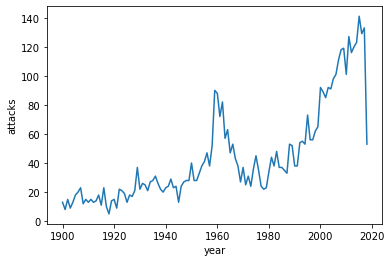

In [30]:
## Quantidade de ataques por ano

attacks_year = df.groupby(by=['year'],as_index=False,)[['fatal']].count()
plt_attacks_year = sns.lineplot(data=attacks_year,x='year',y='fatal')

plt_attacks_year.set(ylabel='attacks')

[Text(0, 0.5, 'attacks')]

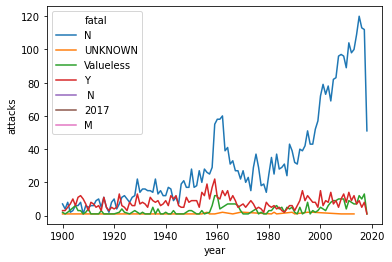

In [31]:
## Quantidade de ataques por ano sendo fatal em vermelho

attacks_year_fatal = df.groupby(by=['year','fatal'],as_index=False)[['type']].count()
plt_attacks_year_fatal = sns.lineplot(x="year", y="type", hue="fatal", data = attacks_year_fatal)
plt_attacks_year_fatal.set(ylabel='attacks')

[Text(0, 0.5, 'attacks')]

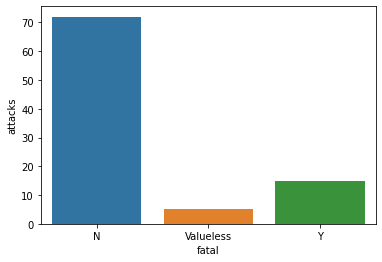

In [34]:
## Ataques fatais ou não

attacks_2000 = df.loc[df['year'] == 2000].groupby(by=['year','fatal'],as_index=False)[['type']].count()
plt_attacks_2000 = sns.barplot(x='fatal', y='type', data = attacks_2000)
plt_attacks_2000.set(ylabel='attacks')

[Text(0.5, 0, 'Count of attacks')]

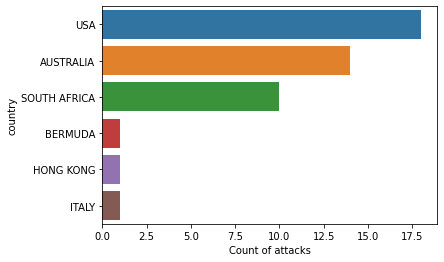

In [36]:
##Ataques por País 

attacks_country = df.loc[df['year'] == 1975].groupby(by=['country'],as_index=False)[['type']].count().sort_values(by='type', ascending=False)
plt_attacks_country = sns.barplot(x='type', y='country', data= attacks_country.head(10))
plt_attacks_country.set(xlabel='Count of attacks')